In [14]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from utils import *

In [30]:
x_train = np.array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862,
           5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794, 6.3654, 5.1301,
           6.4296, 7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828,
           10.957, 13.176, 22.203, 5.2524, 6.5894, 9.2482, 5.8918, 8.2111, 7.9334,
           8.0959, 5.6063, 12.836, 6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247,
           7.0931, 5.0702, 5.8014, 11.7, 5.5416, 7.5402, 5.3077, 7.4239, 7.6031,
           6.3328, 6.3589, 6.2742, 5.6397, 9.3102, 9.4536, 8.8254, 5.1793, 21.279,
           14.908, 18.959, 7.2182, 8.2951, 10.236, 5.4994, 20.341, 10.136, 7.3345,
           6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274, 5.1077, 5.7292,
           5.1884, 6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204, 5.0594,
           5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369])

In [32]:
y_train = np.array([17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12.0,
           6.5987, 3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129,
           5.3048, 0.56077, 3.6518, 5.3893, 3.1386, 21.767, 4.263, 5.1875,
           3.0825, 22.638, 13.501, 7.0467, 14.692, 24.147, -1.22, 5.9966,
           12.134, 1.8495, 6.5426, 4.5623, 4.1164, 3.3928, 10.117, 5.4974,
           0.55657, 3.9115, 5.3854, 2.4406, 6.7318, 1.0463, 5.1337, 1.844,
           8.0043, 1.0179, 6.7504, 1.8396, 4.2885, 4.9981, 1.4233, -1.4211,
           2.4756, 4.6042, 3.9624, 5.4141, 5.1694, -0.74279, 17.929, 12.054,
           17.054, 4.8852, 5.7442, 7.7754, 1.0173, 20.992, 6.6799, 4.0259,
           1.2784, 3.3411, -2.6807, 0.29678, 3.8845, 5.7014, 6.7526, 2.0576,
           0.47953, 0.20421, 0.67861, 7.5435, 5.3436, 4.2415, 6.7981, 0.92695,
           0.152, 2.8214, 1.8451, 4.2959, 7.2029, 1.9869, 0.14454, 9.0551,
           0.61705])

In [36]:
#print x_train
print("Type of x_train", type(x_train))
print("First five elements of x_train" , x_train[:5])

Type of x_train <class 'numpy.ndarray'>
First five elements of x_train [6.1101 5.5277 8.5186 7.0032 5.8598]


In [40]:
#print y_train
print("Type of y_train", type(y_train))
print("First five elements of y_train" , y_train[:5])

Type of y_train <class 'numpy.ndarray'>
First five elements of y_train [17.592   9.1302 13.662  11.854   6.8233]


In [46]:
print("The shape of x_train is", x_train.shape)
print("The shape of y_train is", y_train.shape)
print("number of training examples m", len(x_train))

The shape of x_train is (97,)
The shape of y_train is (97,)
number of training examples m 97


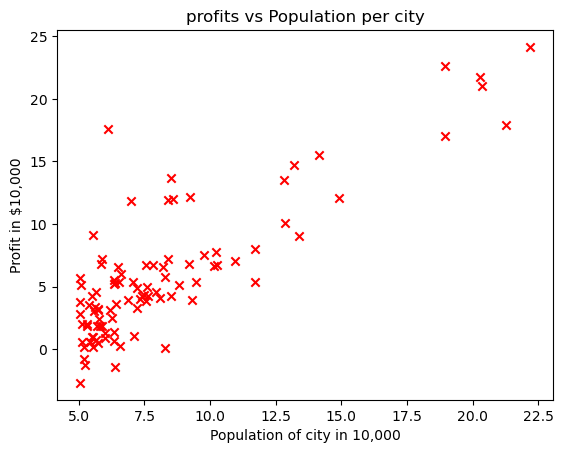

In [58]:
plt.scatter(x_train, y_train, marker='x', color = 'r')
plt.title("profits vs Population per city")
plt.ylabel("Profit in $10,000")
plt.xlabel("Population of city in 10,000")
plt.show()

In [86]:
#Compute cost:
def compute_cost(x,y,w,b):
    """
    Computes the cost function for linear regression 
    Args:
        x (ndarray): Shape (m,) Input to the model (population of the cities)
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w,b (scalar): Prameters of the model 

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression to fit the data points in x and y 
    """
    m = x.shape[0] #Number of training examples 

    total_cost = 0 

    for i in range(m):
        f_wb = w * x[i] + b
        total_cost = total_cost + ((f_wb - y[i]) ** 2 )
    return total_cost / (2 * m)


In [90]:
inital_w = 2
inital_b = 1

cost = compute_cost(x_train, y_train, inital_w, inital_b)
print(type(cost))
print(f'Cost at inital w: {cost:.3f} ')

<class 'numpy.float64'>
Cost at inital w: 75.203 


In [128]:
#Gradient Descent
def compute_gradient(x,y,w,b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw = dj_dw + ((f_wb - y[i]) * x[i])
        dj_db = dj_db + (f_wb - y[i])
    dj_db = dj_db / m
    dj_dw = dj_dw / m
    return dj_dw, dj_db

In [130]:
#Compute gradient with intial values of zero. 
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at test w,b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w,b: -65.32884974555672 -5.83913505154639


In [137]:
#Compute the cost and gradient with non zero w and b
test_w = 0.2
test_b = 0.2

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print('Gradient at test w,b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w,b: -47.41610118114435 -4.007175051546391


In [145]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)

    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 10000:
            cost = cost_function(x,y,w,b)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")
            
    return w, b, J_history, w_history

In [192]:
initial_w = 0
initial_b = 0

iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train, y_train, initial_w, inital_b, compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent: ", w, b)

Iteration    0: Cost     7.35
Iteration  150: Cost     5.78
Iteration  300: Cost     5.23
Iteration  450: Cost     4.92
Iteration  600: Cost     4.73
Iteration  750: Cost     4.63
Iteration  900: Cost     4.56
Iteration 1050: Cost     4.53
Iteration 1200: Cost     4.51
Iteration 1350: Cost     4.49
w,b found by gradient descent:  1.1597204866767057 -3.5641774868624623


In [170]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

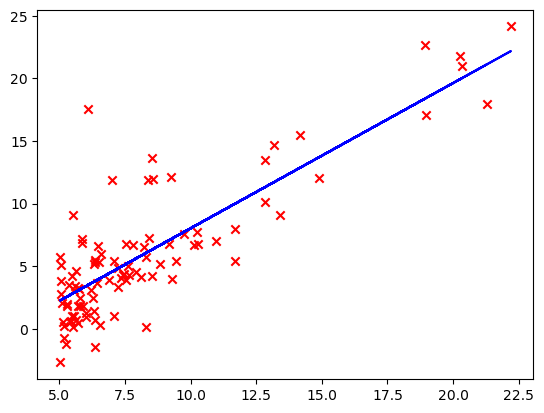

In [174]:
plt.plot(x_train, predicted, c = 'b')

plt.scatter(x_train, y_train, marker = 'x', c = 'r')

In [194]:
predict1 = 3.5 * w + b
predict2 = 7.0 * w + b
print(predict1*10000)
print(predict2*10000)

4948.442165060074
45538.65919874477
